In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.neural_network import MLPClassifier
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve,auc,plot_roc_curve
from sklearn.model_selection import cross_val_score

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [21]:
train_data=pd.read_csv("./data/churn_training_scale.csv")
val_data=pd.read_csv("./data/churn_test_scale.csv")

In [22]:
train_X=train_data.iloc[:,:-1]
train_Y=train_data.iloc[:,-1]
val_X=val_data.iloc[:,:-1]
val_Y=val_data.iloc[:,-1]
print(train_X.shape)
print(val_X.shape)
all_X=pd.concat([train_X,val_X])
all_Y=pd.concat([train_Y,val_Y])

(2000, 17)
(1033, 17)


In [23]:
# print(all_X.shape,all_Y.shape)
train_data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,0.698242,-0.345245,1.601581,1.220987,1.592177,0.469755,1.592445,-0.084763,-0.055220,-0.084570,0.886014,-0.461263,0.885312,-0.087231,-0.613901,-0.087841,-0.443639,0
1,-0.416035,2.896493,-0.624383,-0.596932,2.224013,-1.455263,2.224173,-2.769365,-0.608654,-2.769739,-0.071140,-0.564337,-0.071394,-1.338693,1.087243,-1.342035,0.341622,0
2,-0.643955,2.896493,-0.624383,-0.596932,-0.220436,0.617833,-0.220387,-1.057560,1.101959,-1.056545,-0.271381,1.084850,-0.271634,-0.050424,-0.613901,-0.046943,1.126882,0
3,0.444997,2.896493,-0.624383,-0.596932,0.824027,-0.122558,0.824185,0.374888,0.045404,0.374613,0.069029,0.930239,0.071000,-1.449117,0.661957,-1.451096,-1.228899,0
4,0.419673,-0.345245,-0.624383,-0.596932,0.107455,-0.171918,0.107938,2.970333,-1.011151,2.971209,0.307316,-0.512800,0.306839,-0.565731,-0.188615,-0.564980,-0.443639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.542657,-0.345245,-0.624383,-0.596932,-0.809904,-0.122558,-0.809856,-0.237320,-1.614896,-0.238408,0.419452,1.445610,0.418084,0.575308,0.236671,0.580154,0.341622,0
1996,-0.821226,-0.345245,-0.624383,-0.596932,0.965868,-2.146295,0.966135,-0.956516,-2.268954,-0.956317,-0.183275,1.187924,-0.182639,-0.234462,-0.188615,-0.237799,1.126882,0
1997,-1.834205,-0.345245,-0.624383,-0.596932,0.039298,0.420396,0.039672,1.726104,-2.118018,1.726521,-0.171261,-0.461263,-0.169289,1.421885,0.661957,1.425372,0.341622,0
1998,2.116413,2.896493,-0.624383,-0.596932,0.647187,0.222958,0.647562,-0.833678,-0.809902,-0.832781,-1.226533,1.909444,-1.228340,-1.927617,2.363101,-1.928235,0.341622,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Best: 0.944500 using {'ccp_alpha': 0.000875, 'max_depth': 6}
[0.853  0.869  0.8975 0.916  0.938  0.944  0.9355 0.9345 0.935  0.8525
 0.8695 0.897  0.9165 0.9375 0.9395 0.9395 0.936  0.9355 0.8525 0.869
 0.897  0.917  0.9375 0.942  0.937  0.933  0.932  0.8525 0.869  0.8975
 0.9165 0.938  0.943  0.9375 0.934  0.934  0.853  0.8695 0.8975 0.9155
 0.9375 0.94   0.9375 0.936  0.9335 0.853  0.8695 0.897  0.9165 0.9385
 0.9415 0.937  0.9345]


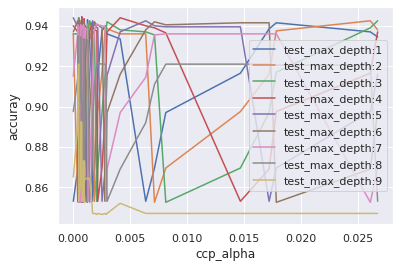

In [24]:
#决策树

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_D = DecisionTreeClassifier()
path=model_D.cost_complexity_pruning_path(train_X,train_Y)
ccp_alpha = path['ccp_alphas'].tolist()
max_depth = range(1,10)
#min_samples_split = range(1,10)
tuned_parameters = dict(max_depth=max_depth, ccp_alpha=ccp_alpha)
DD = GridSearchCV(model_D, tuned_parameters,cv=10)
DD.fit(train_X, train_Y)
print("Best: %f using %s" % (DD.best_score_, DD.best_params_))
prob_y = DD.predict_proba(val_X)[:,1] 
pred_y = np.where(prob_y > 0.5, 1, 0) 
DD.score(val_X, pred_y)
#DD.grid_scores_
test_means = DD.cv_results_[ 'mean_test_score' ]
test_scores = np.array(test_means).reshape(len(max_depth), len(ccp_alpha))
print(test_scores[0])
for i, value in enumerate(max_depth):
    plt.plot(ccp_alpha, test_scores[i], label= 'test_max_depth:'   + str(value))
plt.legend()
plt.xlabel( 'ccp_alpha' )                                                                                                      
plt.ylabel( 'accuray' )
plt.show()

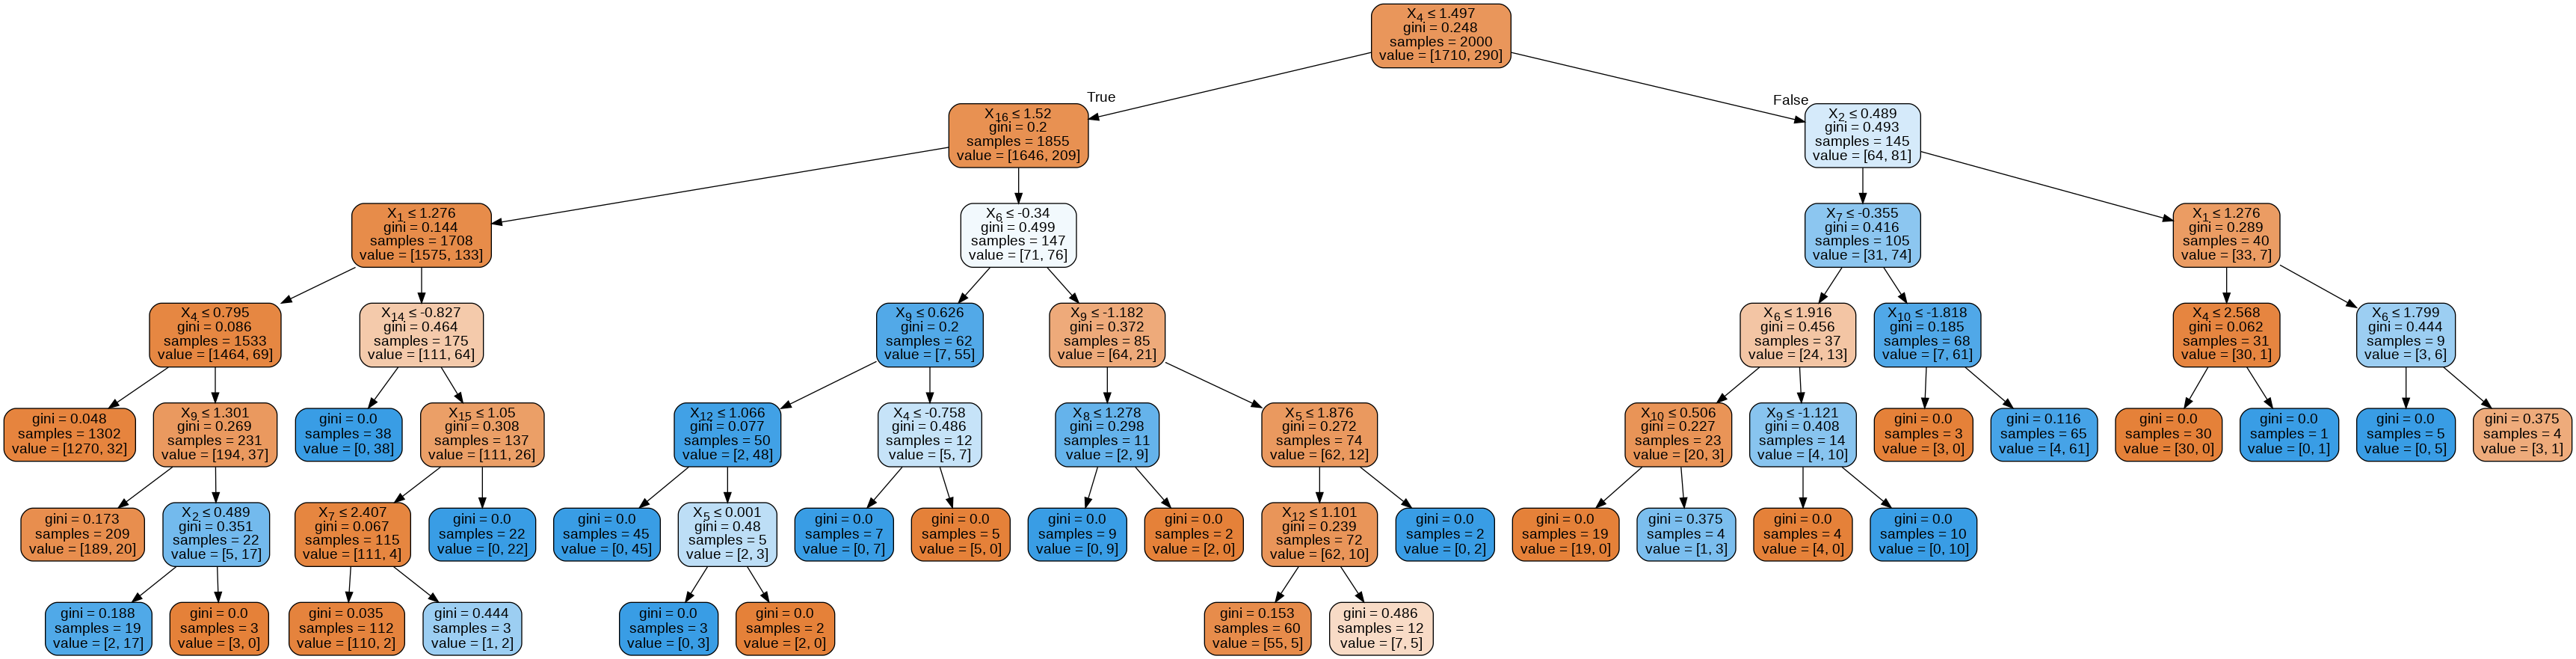

In [25]:
# CCP最优预剪枝
from IPython.display import Image  
from sklearn import tree
import pydotplus 
# clf = DecisionTreeClassifier(max_depth=6,ccp_alpha=0.0009000000000000002)
clf = DecisionTreeClassifier(max_depth=6,ccp_alpha=0.0009000000000000002)
clf.fit(train_X, train_Y)
dot_data = tree.export_graphviz(clf,filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

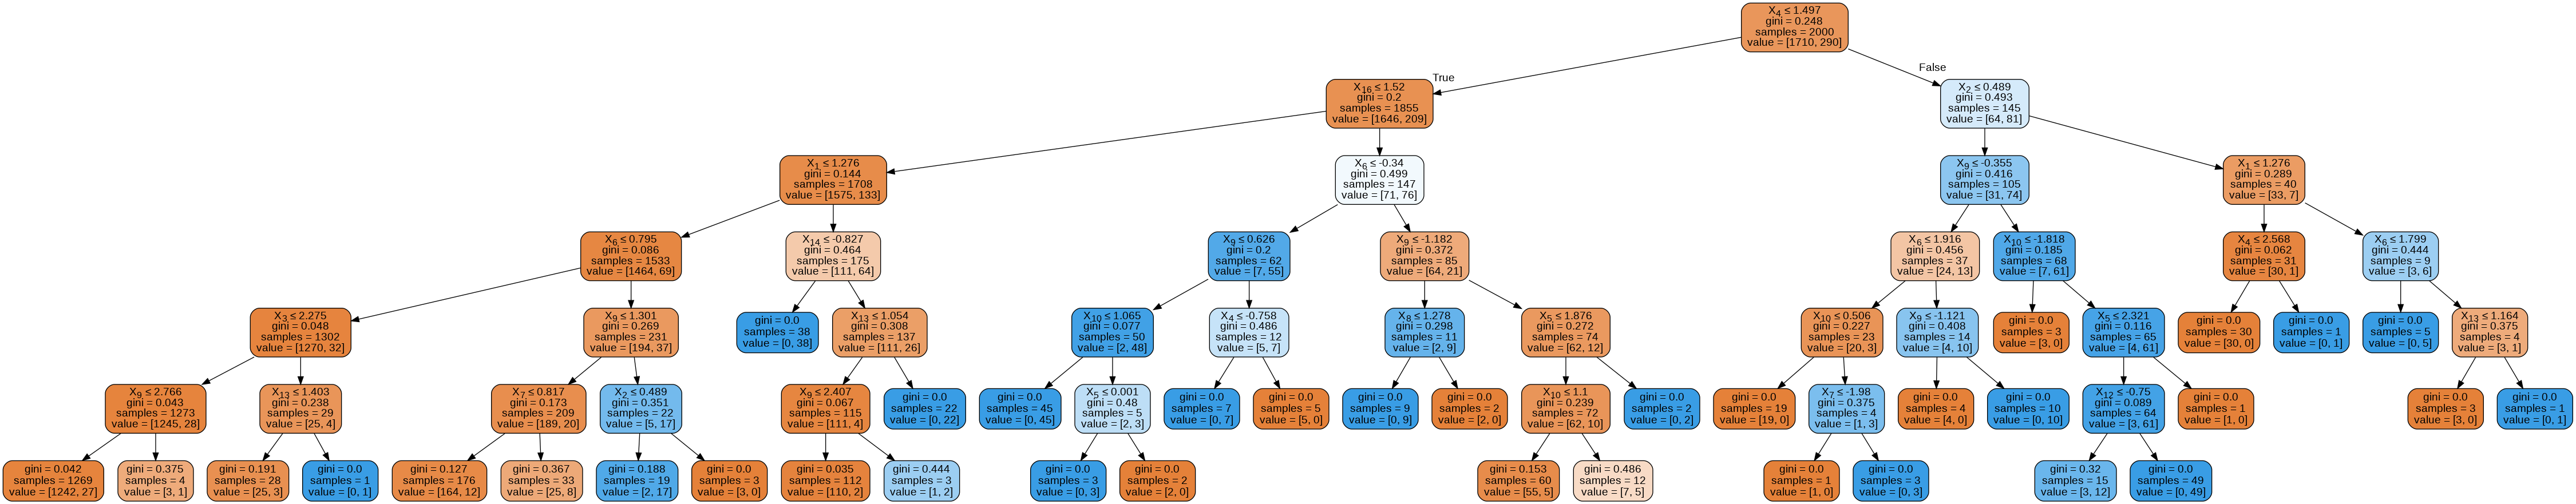

In [26]:
#对比
clf_0 = DecisionTreeClassifier(max_depth=6)
clf_0.fit(train_X, train_Y)

dot_data = tree.export_graphviz(clf_0,filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


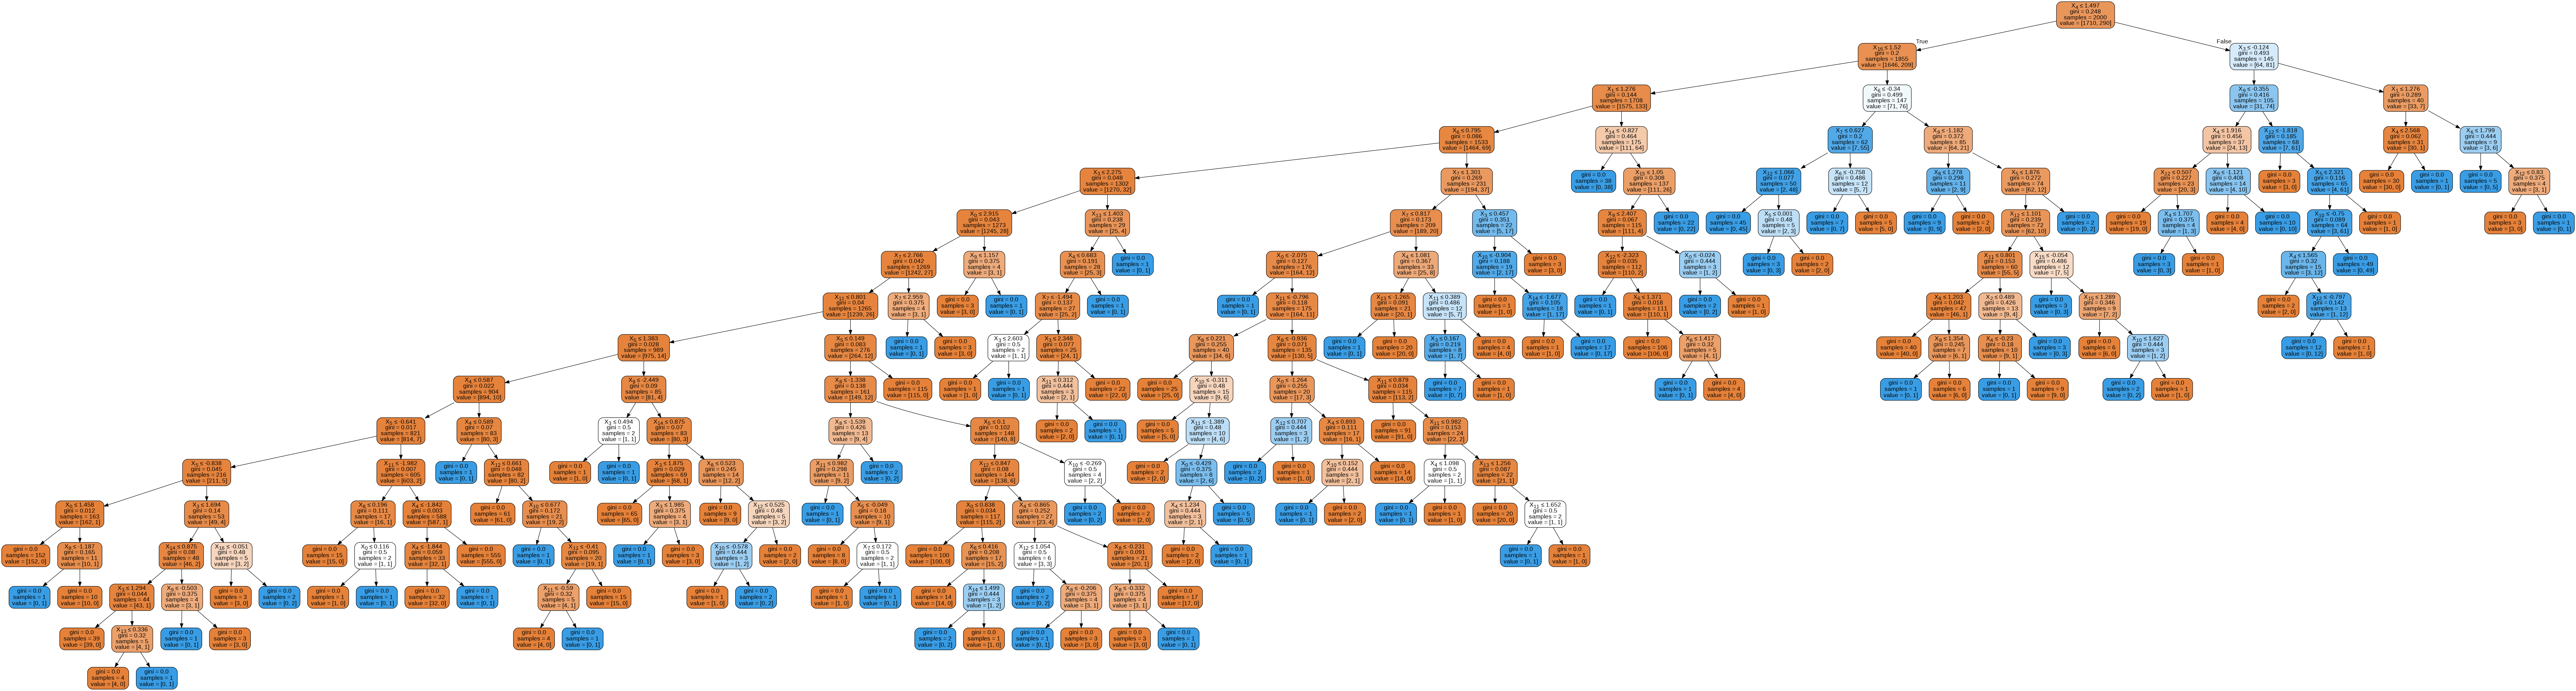

In [27]:
#什么都不做
clf_0 = DecisionTreeClassifier()
clf_0.fit(train_X, train_Y)

print(clf_0)

dot_data = tree.export_graphviz(clf_0,filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

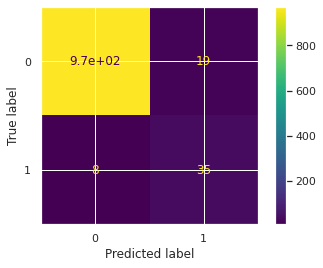

In [29]:
plot_confusion_matrix(clf, val_X, val_Y)

In [30]:
print(accuracy_score(val_Y,pred_y))
print(precision_score(val_Y,pred_y))
print(recall_score(val_Y,pred_y))
print(f1_score(val_Y,pred_y))

0.9738625363020329
0.6481481481481481
0.813953488372093
0.7216494845360826


0.8199882722354631


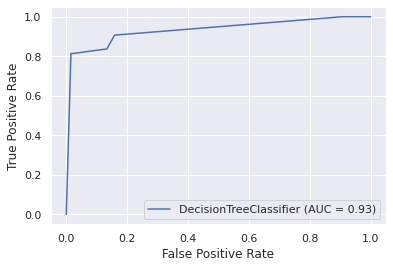

In [31]:
fpr, tpr, thresholds=roc_curve(clf.predict(val_X),val_Y)
plot_roc_curve(clf,val_X,val_Y)
print(auc(fpr,tpr))

In [32]:
print("precision_score:",precision_score(val_Y, pred_y))
print("recall_score:",recall_score(val_Y, pred_y))
print("f1_score:",f1_score(val_Y, pred_y))

precision_score: 0.6481481481481481
recall_score: 0.813953488372093
f1_score: 0.7216494845360826


# 后剪枝

In [33]:
#REP，PEP
import csv

def convert_type(s):
    s = s.strip()

    try:
        return float(s) if '.' in s else int(s)
    except ValueError:
        return s

class utils:
    def count(dataset):
        rst = dict()

        for data in dataset:
            label = data[-1]
            if label not in rst.keys(): 
                rst[label] = 0
            rst[label] += 1
        return rst


    def convert_type(s):
        s = s.strip()

        try:
            return float(s) if '.' in s else int(s)
        except ValueError:
            return s


    def load_dataset():
        reader = csv.reader(open("./data/churn_training_scale.csv",'rt'))
        headings = dict()
        for i, heading in enumerate(next(reader)):
            headings[i] = str(heading)

        dataset = [[convert_type(item) for item in row] for row in reader]
        return (headings, dataset)


In [34]:
def load_dataset():
    reader = csv.reader(open("./data/churn_test_scale.csv",'rt'))
    headings = dict()
    for i, heading in enumerate(next(reader)):
        headings[i] = str(heading)

    dataset = [[convert_type(item) for item in row] for row in reader]
    return (headings, dataset)

In [36]:
from math import log, sqrt
import copy
import codecs
# import utils


class DecisionTree:

    def __init__(self, feature=-1, value=None, true_branch=None, 
                 false_branch=None, results={}, result=None, error=0):
        self.feature = feature
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch
        # Classification result at current node (majority class).
        # These three variables will change when building, evaluating or pruning a tree.
        self.result = result
        self.results = results
        self.error = error

    @classmethod
    def _divide_set(cls, dataset, feature, value):
        if isinstance(value, int) or isinstance(value, float):
            func = lambda data: data[feature] >= value
        else:
            func = lambda data: data[feature] == value

        true_set = [data for data in dataset if func(data)]
        false_set = [data for data in dataset if not func(data)]
        return true_set, false_set

    @classmethod
    def entropy(cls, dataset):
        log2 = lambda x: log(x) / log(2)
        rst = utils.count(dataset)
        entropy = 0.0

        for r in rst:
            p = float(rst[r]) / len(dataset)
            entropy -= p * log2(p)
        return entropy

    @classmethod
    def gini(cls, dataset):
        rst = utils.count(dataset)
        gini = 1.0

        for r in rst:
            gini -= (rst[r] / len(dataset)) ** 2
        return gini

    @classmethod
    def build_tree(cls, dataset, func):
        if len(dataset) == 0:
            return DecisionTree()

        best_gain = 0.0
        best_feature = None
        best_split = None
        cur_score = func(dataset)
        feature_cnt = len(dataset[0]) - 1

        results = utils.count(dataset)
        result = sorted(results.items(), key=lambda x: x[1], reverse=True)[0][0]
        error = 0
        for k, v in results.items():
            if k != result:
                error += v

        # Choose the best feature
        for i in range(feature_cnt):

            unique_values = list(set([data[i] for data in dataset]))
            for v in unique_values:
                true_set, false_set = cls._divide_set(dataset, i, v)

                p_true = float(len(true_set)) / len(dataset)
                p_false = 1 - p_true
                gain = cur_score - p_true * \
                    func(true_set) - p_false * func(false_set)

                if gain > best_gain and len(true_set) and len(false_set):
                    best_gain = gain
                    best_feature = (i, v)
                    best_split = (true_set, false_set)

        if not best_gain:
            return DecisionTree(result=result, results=results, error=error)

        true_branch = cls.build_tree(best_split[0], func)
        false_branch = cls.build_tree(best_split[1], func)
        return DecisionTree(feature=best_feature[0], value=best_feature[1], \
                    true_branch=true_branch, false_branch=false_branch, \
                    result=result, results=results, error=error)

    @classmethod
    def plot_tree(cls, tree, headings, filepath=None):

        def _tree_to_str(tree, indent='\t\t'):
            # General output
            output = str(tree.result) + ' ' + str(tree.results) + \
                    ' err=' + str(tree.error)

            # Leaf node
            if not (tree.true_branch or tree.false_branch):
                return output

            if tree.feature in headings:
                col = headings[tree.feature]

            if isinstance(tree.value, int) or isinstance(tree.value, float):
                decision = ' %s >= %s ?' % (col, tree.value)
            else:
                decision = ' %s == %s ?' % (col, tree.value)

            true_branch = indent + 'yes -> ' + \
                _tree_to_str(tree.true_branch, indent + '\t\t')
            false_branch = indent + 'no  -> ' + \
                _tree_to_str(tree.false_branch, indent + '\t\t')
            return output + decision + '\n' + true_branch + '\n' + false_branch

        str_tree = _tree_to_str(tree)

        if filepath:
            with codecs.open(filepath, 'w', encoding='utf-8') as f:
                f.write(str_tree)
        else:
            print(str_tree)

    @classmethod
    def evaluate(cls, tree, dataset):

        def _evaluate(eval_tree, dataset):
            eval_tree.results = utils.count(dataset)
            # print("utils.count(dataset)",utils.count(dataset))
            eval_tree.error = 0
            for k, v in eval_tree.results.items():
                # val_Y_2.append(eval_tree.result)
                # pred_y_2.append(k)
                if k != eval_tree.result:
                    eval_tree.error += v

            
            # Leaf node
            if not (eval_tree.true_branch or eval_tree.false_branch):
                return eval_tree.error

            true_set = []
            false_set = []
            for data in dataset:
                v = data[eval_tree.feature]
                # print(data[eval_tree.feature])
                if isinstance(v, int) or isinstance(v, float):
                    if v >= eval_tree.value:
                        true_set.append(data)
                    else:
                        false_set.append(data)
                else:
                    if v == eval_tree.value:
                        true_set.append(data)
                    else:
                        false_set.append(data)

            return cls.evaluate(eval_tree.true_branch, true_set) + \
                    cls.evaluate(eval_tree.false_branch, false_set)

        # Deepcopy the tree to store test set info
        eval_tree = copy.deepcopy(tree)

        return _evaluate(eval_tree, dataset)

    @classmethod
    def count_leaves(cls, tree):
        if not (tree.true_branch or tree.false_branch):
            return 1
        return cls.count_leaves(tree.true_branch) + cls.count_leaves(tree.false_branch)

    @classmethod
    def reduced_error_pruning(cls, tree):
        # Bottom-up, left-to-right
        # Leaf node
        if not (tree.true_branch or tree.false_branch):
            return tree.error
        error_true = cls.reduced_error_pruning(tree.true_branch)
        error_false = cls.reduced_error_pruning(tree.false_branch)

        # Prune its subtree if it has less error
        if tree.error <= error_true + error_false:
            tree.true_branch = None
            tree.false_branch = None
            return tree.error
        else:
            return error_true + error_false

    @classmethod
    def _pessimistic_error(cls, tree):
        # Leaf node
        if not (tree.true_branch or tree.false_branch):
            return tree.error + 0.5
        return cls._pessimistic_error(tree.true_branch) + \
                cls._pessimistic_error(tree.false_branch)

    @classmethod
    def top_down_pessimistic_pruning(cls, tree):
        # Top-down, left-to-right
        # Leaf node
        if not (tree.true_branch or tree.false_branch):
            return

        error_leaf = tree.error + 0.5
        error_subtree = cls._pessimistic_error(tree)
        p = 1 - error_subtree / sum(tree.results.values())
        # p < 0 in few cases
        p = 0 if p < 0 else p

        if error_leaf <= error_subtree + sqrt(error_subtree * p):
            tree.true_branch = None
            tree.false_branch = None
        else:
            cls.top_down_pessimistic_pruning(tree.true_branch)
            cls.top_down_pessimistic_pruning(tree.false_branch)

    @classmethod
    def bottom_up_pessimistic_pruning(cls, tree):
        # Bottom-up, left-to-right
        sum_ = sum(tree.results.values())
        p = (1 + tree.error) / (2 + sum_)
        # Laplace estimate
        error_leaf = sum_ * (p + 1.15 * sqrt(p * (1 - p) / (sum_ + 2)))

        # Leaf node
        if not (tree.true_branch or tree.false_branch):
            return error_leaf

        error_subtree = cls.bottom_up_pessimistic_pruning(tree.true_branch) + \
                        cls.bottom_up_pessimistic_pruning(tree.false_branch)
        if error_leaf <= error_subtree:
            tree.true_branch = None
            tree.false_branch = None
            return error_leaf
        return error_subtree

    @classmethod
    def minimum_error_pruning(cls, tree):
        # Bottom-up, left-to-right
        sum_ = sum(tree.results.values())
        # (n(error) + k - 1) / n(all) + k
        error_leaf = (tree.error + 2) / (sum_ + 3)

        # Leaf node
        if not (tree.true_branch or tree.false_branch):
            return sum_, error_leaf

        sum_true, error_true = cls.minimum_error_pruning(tree.true_branch)
        sum_false, error_false = cls.minimum_error_pruning(tree.false_branch)
        error_subtree = sum_true / sum_ * error_true + sum_false / sum_ * error_false

        if error_leaf <= error_subtree:
            tree.true_branch = None
            tree.false_branch = None
            return sum_, error_leaf
        return sum_, error_subtree


In [37]:
import random
# import utils
# import conf
# from tree import DecisionTree


def main():
    # Steps to build and prune a decision tree:

    # 1. Prepare dataset.
    headings, dataset = utils.load_dataset()
    random.shuffle(dataset)

    headings2, dataset2 = load_dataset()
    random.shuffle(dataset2)

    # Split the dataset into training data, test data and pruning data if needed.
    train_data = dataset[:2000]
    test_data = dataset2[:2000]
    # prune_data = dataset[:]

    # 2. Grow a decision tree from training data based on entropy or gini.
    dt = DecisionTree.build_tree(train_data, DecisionTree.entropy)
    # dt = DecisionTree.build_tree(train_data, DecisionTree.gini)

    # 3. Visualize the tree.
    # DecisionTree.plot_tree(dt, headings, conf.org_tree_filepath)
    # leaves = DecisionTree.count_leaves(dt)
    # print('Leaves count before pruning: %d' % leaves)

    # 4. Run the test data through the tree.
    err = DecisionTree.evaluate(dt, test_data)
    print('Accuracy before pruning: %d/%d = %f' %
          (len(test_data) - err, len(test_data), (len(test_data) - err) / len(test_data)))

    # 5. Prune the tree.
    #   5.1 REP: REP requires another dataset for pruning, so we need to split the dataset in a different way.
    DecisionTree.reduced_error_pruning(dt)
    #   5.2 PP: top-down
    DecisionTree.top_down_pessimistic_pruning(dt)

    #   5.3 PP: bottom-up.
    DecisionTree.bottom_up_pessimistic_pruning(dt)

    #   5.4 MEP
    # DecisionTree.minimum_error_pruning(dt)

    # 6. Visualize the pruned tree.
    # DecisionTree.plot_tree(dt, headings, conf.prn_tree_filepath)
    leaves = DecisionTree.count_leaves(dt)
    print('Leaves count after pruning: %d' % leaves)

    # 7. Check if the classification ability is improved after pruning.
    err = DecisionTree.evaluate(dt, test_data)
    print('Accuracy after pruning: %d/%d = %f' %
          (len(test_data) - err, len(test_data), (len(test_data) - err) / len(test_data)))

if __name__ == '__main__':
    print("running\n")
    main()


running

Accuracy before pruning: 962/1033 = 0.931268
Leaves count after pruning: 31
Accuracy after pruning: 982/1033 = 0.950629


# 评价指标

k折交叉检验

In [40]:
cross_val_score(clf,all_X,all_Y,cv=5)

array([0.95222405, 0.93904448, 0.95057661, 0.94719472, 0.9669967 ])

In [42]:
print("f1_score:",f1_score(val_Y, pred_y))

f1_score: 0.7216494845360826


0.8199882722354631


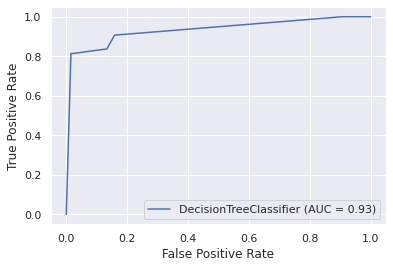

In [43]:
fpr, tpr, thresholds=roc_curve(clf.predict(val_X),val_Y)
plot_roc_curve(clf,val_X,val_Y)
print(auc(fpr,tpr))

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)
print(accuracy_score(clf.predict(val_X),val_Y))

0.9380445304937076


[[934  56]
 [  8  35]]


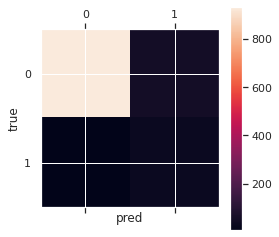

In [46]:
pred_y = clf.predict(val_X)
# print(pre_y)
labels = [0,1]
maxtrix = confusion_matrix(val_Y, pred_y,labels=labels)
print(maxtrix)
plt.matshow(maxtrix)
plt.colorbar()
plt.xlabel('pred')
plt.ylabel('true')
plt.xticks(np.arange(maxtrix.shape[1]),labels)
plt.yticks(np.arange(maxtrix.shape[1]),labels)
plt.show()

In [45]:
# 查看分类报告 
from sklearn import metrics
y_true, y_pred = val_Y, clf.predict(val_X)
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       990
           1       0.38      0.81      0.52        43

    accuracy                           0.94      1033
   macro avg       0.69      0.88      0.74      1033
weighted avg       0.97      0.94      0.95      1033

